In [1]:
import hist
import numpy as np
import os
from pathlib import Path
import sys

In [2]:
current_dir = Path.cwd()
pikls = current_dir / 'pikls' / 'AN_plot_processor'
src = current_dir.parent.parent / 'src'

sys.path.append(str(src))
sys.path.append(str(pikls))

from analysis_tools.plotting.efficiencies import calc_eff_err

In [3]:
pikls_to_open = []
for file in pikls.iterdir():
    print(file)
    pikls_to_open.append(file)

/home/cms-jovyan/dwg_experimental/notebooks/new_AN_plots/pikls/AN_plot_processor/SlepSnu_MN1-270_MN2-280_MC1-275.pkl
/home/cms-jovyan/dwg_experimental/notebooks/new_AN_plots/pikls/AN_plot_processor/TTto2L2Nu.pkl


In [4]:
pikls_to_open

[PosixPath('/home/cms-jovyan/dwg_experimental/notebooks/new_AN_plots/pikls/AN_plot_processor/SlepSnu_MN1-270_MN2-280_MC1-275.pkl'),
 PosixPath('/home/cms-jovyan/dwg_experimental/notebooks/new_AN_plots/pikls/AN_plot_processor/TTto2L2Nu.pkl')]

In [5]:
import cloudpickle

results = {}

for file in pikls_to_open:
    with open(file, "rb") as f:
        result = cloudpickle.load(f)
        for key, value in result.items():
            print(key)
            results[key]=value

SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3
TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2


In [6]:
results.keys()

dict_keys(['SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3', 'TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8130X_mcRun3_2023_realistic_v14-v2'])

In [7]:
list(results.keys())[0]

'SlepSnuCascade_MN1-270_MN2-280_MC1-275_TuneCP5_13p6TeV_madgraphMLM-pythia8130X_mcRun3_2023_realistic_postBPix_v6-v3'

In [8]:
r = results[list(results.keys())[0]]

In [9]:
r

{'total_entries': 459524,
 'ele_dict': {'pt_eta_hist': Hist(
    Variable([2, 3, 4, 5, 7, 10, 20, 45, 75, 1000], name='pt'),
    Variable([0, 0.8, 1.442, 1.556, 2.5], name='eta'),
    IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
    IntCategory([-1, 1, 2, 3], name='qual_tag'),
    storage=Double()) # Sum: 435009.0 (480359.0 with flow),
  'pt_AN_hist_v1': Hist(
    Regular(40, 0, 100, name='pt'),
    IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
    IntCategory([-1, 1, 2, 3], name='qual_tag'),
    storage=Double()) # Sum: 473197.0 (480359.0 with flow),
  'pt_AN_hist_v2': Hist(
    Variable(array([  2. ,   3. ,   4. ,   5. ,   7. ,  10. ,  12.5,  15. ,  17.5,
          20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,
          42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,
          65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,
          87.5,  90. ,  92.5,  95. ,  97.5, 100. ]), name='pt'),
    IntCategory([-10, 10, 11, 12, 13], n

In [10]:
def make_plot_pt_ID(hist, title, num_events, sample_name, filename):
    plt.title(title, pad=35, fontsize=35)
    vmin = 0.0001
    vmax = 0.01
    

    # Normalize bin contents
    view = hist.view(flow=False)
    norm = view.sum()
    if norm > 0:
        hist.view(flow=False)[:] = view / norm  # overwrite in place

    mplhep.cms.label(loc=0, fontsize=20, com=13.6)
    plt.text(2.5, -0.8, f"numEvents = {num_events}", fontsize=15)
    plt.text(-0.5, 0, f"sample: {sample_name}", fontsize=13, rotation=90)
    
    #hist.plot2d(norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    hist.plot2d(norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    #hist.plot2d()

    plt.yticks(range(int(plt.ylim()[0]), int(plt.ylim()[1]) + 1, 2))
    plt.axhline(y=1.5, color='red', linestyle='--', linewidth=3)
    plt.savefig(filename)
    plt.show()

In [11]:
def make_plot_pt_ID_v2(ax, hist, title, num_events, sample_name, filename):
    vmin = 0.0001
    vmax = 0.01

    # Normalize bin contents
    view = hist.view(flow=False)
    norm = view.sum()
    if norm > 0:
        hist.view(flow=False)[:] = view / norm  # overwrite in place

    mplhep.cms.label(loc=0, fontsize=22, com=13.6, ax=ax)
    ax.set_title(title, pad=35, fontsize=35)
    ax.set_xlabel('LowPtElectron $p_T$ (GeV)')
    ax.text(2.5, -0.8, f"numEvents = {num_events}", fontsize=16, fontweight="bold")
    ax.text(-0.8, 0, f"{sample_name}", fontsize=15, rotation=90, fontweight="bold")
    ax.set_xticks(range(0, 20, 5))

    # Ensure this ax is current for plot2d (in case plot2d uses plt.gca())
    plt.sca(ax)
    hist.plot2d(norm=colors.LogNorm(vmin=vmin, vmax=vmax), ax=ax)

    # Y ticks every 2 units
    y0, y1 = ax.get_ylim()
    ax.set_yticks(range(int(y0), int(y1) + 1, 2))

    ax.axhline(y=1.5, color='red', linestyle='--', linewidth=3)

    # Save whole figure (or just leave saving to caller if preferred)
    ax.figure.savefig(filename)

In [12]:
def two_d_eff_err(h_num, h_denom): # h_num and h_denom must have same binning in both dimensions

    eff_h = h_num/h_denom # Creating a histogram
    
    err_h = np.sqrt(eff_h.values() * (1 - eff_h.values())/ h_denom.values())

    return eff_h, err_h

In [13]:
def plot_eta_pt_eff_v2(hist_num, hist_denom, title, source, sample_name="test", save_name="test", color="cividis", vmin=0, vmax=1, event_count=None):

    fig, ax = plt.subplots(figsize=(20, 20))
    mplhep.style.use(mplhep.style.CMS)
    mplhep.cms.label(loc=0, fontsize=28, com=13.6)

    eff = two_d_eff_err(hist_num, hist_denom)
    
    
    pt_edges = hist_num.axes[0].edges
    pt_centers = [(pt_edges[i] + pt_edges[i+1])/2 for i in range(len(pt_edges) - 1)]
    
    eta_edges = hist_num.axes[1].edges
    eta_centers = [(eta_edges[i] + eta_edges[i+1])/2 for i in range(len(eta_edges) - 1)]
    eta_labels = [fr"{eta_edges[i]:.3g} $< \eta \leq$ {eta_edges[i+1]:.3g}" for i in range(len(eta_edges) - 1)]
    
    
    #"viridis", "plasma", "inferno", "magma", "cividis"
    #plt.imshow(hist, aspect='auto', origin='lower', norm=colors.LogNorm())
    plt.imshow(
    eff[0],
    aspect='auto',
    cmap=color,
    origin='lower',
    extent=[eta_edges[0], eta_edges[-1], pt_edges[0], pt_edges[-1]],
    vmin=vmin,    # minimum value for color scale
    vmax=vmax     # maximum value for color scale
    )
    
    plt.xticks(ticks=eta_centers, labels=eta_labels, fontsize=30)
    plt.yticks(fontsize=35)

    # Get the efficiency values and errors
    values = np.nan_to_num(eff[0], nan=0.0)
    errors = np.nan_to_num(eff[1], nan=0.0)
    
    # Calculate bin centers for both axes
    

    # Loop through each bin and add text
    for i in range(len(pt_centers)):
        for j in range(len(eta_centers)):
            val = values[i, j]
            err = errors[i, j]
            plt.text(eta_centers[j], pt_centers[i], 
                    f"{val:.3f} ± {err:.3f}", 
                    ha='center', va='center', 
                    color='white', fontsize=25,
                    path_effects=[
                    path_effects.Stroke(linewidth=2, foreground='black'),
                    path_effects.Normal()
            ])
    
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.tick_params(axis='x', pad=15)
    plt.tick_params(axis='y', pad=15)

    plt.ylabel("Electron $p_T$", fontsize=50)
    plt.title(f"Electron {title} Eff.", fontsize = 60, pad=60)

    
    plt.text(-0.3, pt_edges[3], f"Sample: {sample_name} {source}", ha='center', rotation=90, va='center', color='black', fontsize=35)
    if event_count is not None:
        plt.text(-0.17, pt_edges[3], f"num Events: {event_count}", ha='center', rotation=90, va='center', color='black', fontsize=30)

    plt.colorbar()
    plt.savefig(f"plots/{save_name}")
    plt.show()

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep
mplhep.style.use(mplhep.style.CMS)
plt.figure()
mplhep.style.use(mplhep.style.CMS)

<Figure size 1000x1000 with 0 Axes>

In [15]:
histo = r['ele_dict']['pt_eta_hist']
#histo.values()

In [16]:
histo = r['ele_dict']['pt_eta_hist']
histo

histo

Hist(
  Variable([2, 3, 4, 5, 7, 10, 20, 45, 75, 1000], name='pt'),
  Variable([0, 0.8, 1.442, 1.556, 2.5], name='eta'),
  IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
  IntCategory([-1, 1, 2, 3], name='qual_tag'),
  storage=Double()) # Sum: 435009.0 (480359.0 with flow)

In [17]:
print("Type:", type(histo))

Type: <class 'hist.hist.Hist'>


In [18]:
histo.axes

(Variable([2, 3, 4, 5, 7, 10, 20, 45, 75, 1000], name='pt'),
 Variable([0, 0.8, 1.442, 1.556, 2.5], name='eta'),
 IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
 IntCategory([-1, 1, 2, 3], name='qual_tag'))

In [19]:
r['ele_dict']

{'pt_eta_hist': Hist(
   Variable([2, 3, 4, 5, 7, 10, 20, 45, 75, 1000], name='pt'),
   Variable([0, 0.8, 1.442, 1.556, 2.5], name='eta'),
   IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
   IntCategory([-1, 1, 2, 3], name='qual_tag'),
   storage=Double()) # Sum: 435009.0 (480359.0 with flow),
 'pt_AN_hist_v1': Hist(
   Regular(40, 0, 100, name='pt'),
   IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
   IntCategory([-1, 1, 2, 3], name='qual_tag'),
   storage=Double()) # Sum: 473197.0 (480359.0 with flow),
 'pt_AN_hist_v2': Hist(
   Variable(array([  2. ,   3. ,   4. ,   5. ,   7. ,  10. ,  12.5,  15. ,  17.5,
         20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,
         42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,
         65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,
         87.5,  90. ,  92.5,  95. ,  97.5, 100. ]), name='pt'),
   IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
   IntCategory([-1, 1, 2, 3], name='qual

In [20]:
pt_AN_hist_v1 = r['ele_dict']['pt_AN_hist_v1']
pt_AN_hist_v2 = r['ele_dict']['pt_AN_hist_v2']

In [21]:
pt_AN_hist_v1

Hist(
  Regular(40, 0, 100, name='pt'),
  IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
  IntCategory([-1, 1, 2, 3], name='qual_tag'),
  storage=Double()) # Sum: 473197.0 (480359.0 with flow)

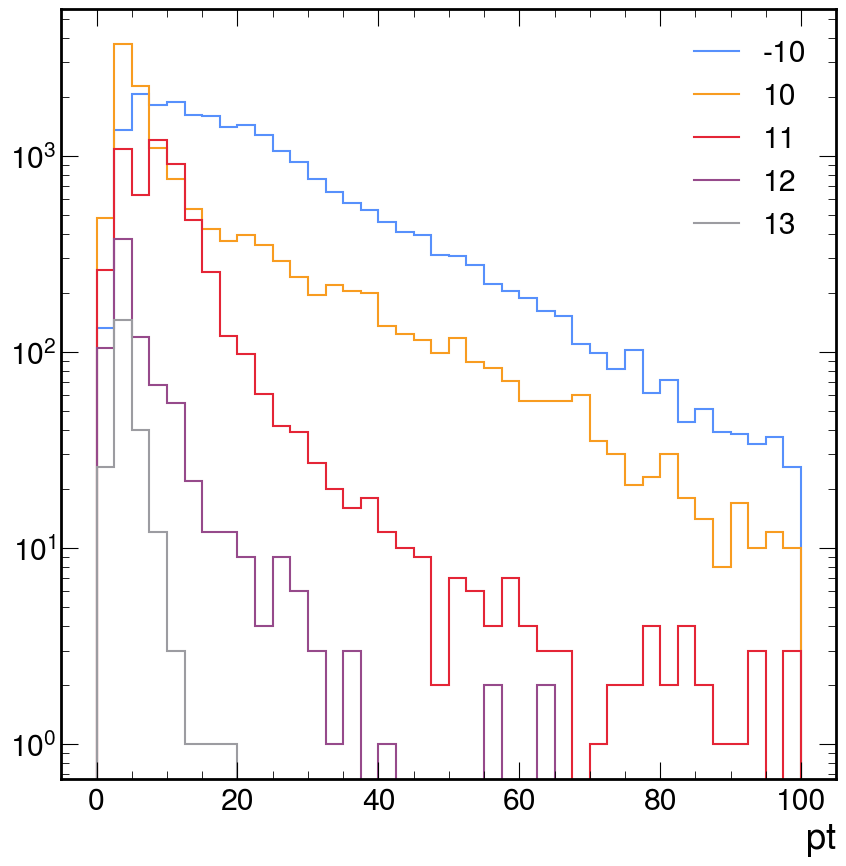

In [22]:
pt_AN_hist_v1[:,:,1j].plot()

plt.yscale('log')
plt.legend()
#print(pt_AN_hist_v1.values())

In [23]:
r_slepsnu = results[list(results)[0]]
r_ttbar = results[list(results)[1]]

In [24]:
print(r_slepsnu['total_entries'])
print(r_ttbar['total_entries'])

459524
5658000


In [25]:
print(r_slepsnu.keys())
print(r_slepsnu['ele_dict'].keys())

dict_keys(['total_entries', 'ele_dict', 'muon_dict'])
dict_keys(['pt_eta_hist', 'pt_AN_hist_v1', 'pt_AN_hist_v2', 'pt_AN_hist_v3', 'pt_AN_hist_muon'])


In [26]:
signal_pt_hist_v1 = r_slepsnu['ele_dict']['pt_AN_hist_v1']
signal_pt_hist_v2 = r_slepsnu['ele_dict']['pt_AN_hist_v2']

fakes_pt_hist_v1 = r_ttbar['ele_dict']['pt_AN_hist_v1']
fakes_pt_hist_v2 = r_ttbar['ele_dict']['pt_AN_hist_v2']

In [27]:
signal_pt_hist_v1.axes

(Regular(40, 0, 100, name='pt'),
 IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
 IntCategory([-1, 1, 2, 3], name='qual_tag'))

In [28]:
signal_pt_hist_v2.axes

(Variable(array([  2. ,   3. ,   4. ,   5. ,   7. ,  10. ,  12.5,  15. ,  17.5,
         20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,
         42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,
         65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,
         87.5,  90. ,  92.5,  95. ,  97.5, 100. ]), name='pt'),
 IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
 IntCategory([-1, 1, 2, 3], name='qual_tag'))

# THE j TELLS THE SLICE TO BE ON THE ACTUAL DATA VALUE INSTEAD OF INDEX

In [29]:
signal_pt_hist_v1[10:, :, 1j] #corresponds to bronze, for all gens

Hist(
  Regular(30, 25, 100, name='pt'),
  IntCategory([-10, 10, 11, 12, 13], name='gen_tag'),
  storage=Double()) # Sum: 11306.0 (42646.0 with flow)

In [30]:
signal_pt_hist_v1[:, 10j, :] #corresponds to signal, for all quals 

Hist(
  Regular(40, 0, 100, name='pt'),
  IntCategory([-1, 1, 2, 3], name='qual_tag'),
  storage=Double()) # Sum: 90739.0 (92004.0 with flow)

In [31]:
signal_pt_hist_v1[:, 10j, 3j] # signal gold

Hist(Regular(40, 0, 100, name='pt'), storage=Double()) # Sum: 48374.0 (49341.0 with flow)

In [32]:
signal_pt_hist_v1[:, 10j, 3j] 

Hist(Regular(40, 0, 100, name='pt'), storage=Double()) # Sum: 48374.0 (49341.0 with flow)

In [33]:
edges = signal_pt_hist_v2.axes[0].edges
edges

array([  2. ,   3. ,   4. ,   5. ,   7. ,  10. ,  12.5,  15. ,  17.5,
        20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,
        42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,
        65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,
        87.5,  90. ,  92.5,  95. ,  97.5, 100. ])

In [34]:
edges[:-1]

array([ 2. ,  3. ,  4. ,  5. ,  7. , 10. , 12.5, 15. , 17.5, 20. , 22.5,
       25. , 27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. ,
       52.5, 55. , 57.5, 60. , 62.5, 65. , 67.5, 70. , 72.5, 75. , 77.5,
       80. , 82.5, 85. , 87.5, 90. , 92.5, 95. , 97.5])

In [35]:
edges[1:]

array([  3. ,   4. ,   5. ,   7. ,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. ])

In [36]:
(edges[:-1] + edges[1:]) * 0.5

array([ 2.5 ,  3.5 ,  4.5 ,  6.  ,  8.5 , 11.25, 13.75, 16.25, 18.75,
       21.25, 23.75, 26.25, 28.75, 31.25, 33.75, 36.25, 38.75, 41.25,
       43.75, 46.25, 48.75, 51.25, 53.75, 56.25, 58.75, 61.25, 63.75,
       66.25, 68.75, 71.25, 73.75, 76.25, 78.75, 81.25, 83.75, 86.25,
       88.75, 91.25, 93.75, 96.25, 98.75])

/usr/local/lib/python3.12/site-packages/hist/basehist.py:417: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


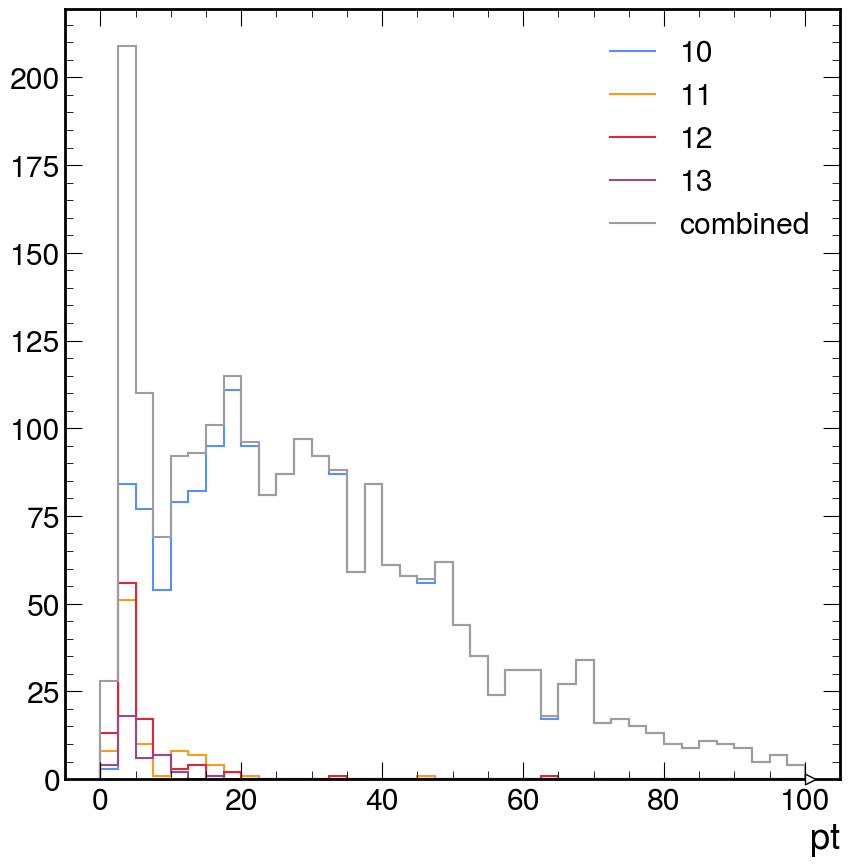

In [37]:
#signal_pt_hist_v1[:, 10j, :[1j,2j,3j]]
signal_pt_hist_v1[{"gen_tag": [10j,11j,12j,13j], "qual_tag": 2j}].plot()

combined = signal_pt_hist_v1.integrate("gen_tag", [10j,11j,12j,13j])
combined[{"qual_tag": 2}].plot(label="combined")

plt.legend()

In [38]:
"""
fig, axes = plt.subplots(figsize=(18, 10))
sig_gold = signal_hist[:, 10j, 3j]
sig_silver = signal_hist[:, 10j, 2j]
sig_bronze = signal_hist[:, 10j, 1j]
sig_baseline = signal_hist.integrate("qual_tag", [1j,2j,3j])[:, 10j]
print(baseline_hist.axes)
#sig_baseline = baseline_hist[:, 10j]

sig_gold.plot()
sig_silver.plot()
sig_bronze.plot()
sig_baseline.plot()
plt.legend()
plt.show()
"""

'\nfig, axes = plt.subplots(figsize=(18, 10))\nsig_gold = signal_hist[:, 10j, 3j]\nsig_silver = signal_hist[:, 10j, 2j]\nsig_bronze = signal_hist[:, 10j, 1j]\nsig_baseline = signal_hist.integrate("qual_tag", [1j,2j,3j])[:, 10j]\nprint(baseline_hist.axes)\n#sig_baseline = baseline_hist[:, 10j]\n\nsig_gold.plot()\nsig_silver.plot()\nsig_bronze.plot()\nsig_baseline.plot()\nplt.legend()\nplt.show()\n'

In [49]:
def make_AN_1d_pt_eff(signal, fakes, name="default_name", title=None, plot_txt=None, savefig=False):

    from matplotlib.lines import Line2D

    fig, ax = plt.subplots(figsize=(16.5, 12))

    sig_gold = signal[:, 10j, 3j] #10j corresponds to my assignment in gen_tagger, 10 == signal (from PV) and other requirements
    sig_silver = signal[:, 10j, 2j]
    sig_bronze = signal[:, 10j, 1j]
    sig_baseline = signal.integrate("qual_tag", [1j,2j,3j])[:, 10j]

    fake_gold = fakes[:, 11j, 3j] #11j corresponds to my assignment in gen_tagger, 11 == light fake (unmatched to PV)
    fake_silver = fakes[:, 11j, 2j]
    fake_bronze = fakes[:, 11j, 1j]
    fake_baseline = fakes.integrate("qual_tag", [1j,2j,3j])[:, 11j]

    
    sig_gold_eff_err = calc_eff_err(sig_gold, sig_baseline) 
    sig_silver_eff_err = calc_eff_err(sig_silver, sig_baseline)
    sig_bronze_eff_err = calc_eff_err(sig_bronze, sig_baseline)

    fake_gold_eff_err = calc_eff_err(fake_gold, fake_baseline)
    fake_silver_eff_err = calc_eff_err(fake_silver, fake_baseline)
    fake_bronze_eff_err = calc_eff_err(fake_bronze, fake_baseline)
    
    ax.set_ylim(0,1)

    edges = signal.axes[0].edges
    
    xes = (edges[:-1] + edges[1:]) * 0.5
    
    my_ms = 14
    my_cs = 11
    
    #plt.errorbar(2.5, y=sig_gold_eff_err[0], yerr=sig_gold_eff_err[1], fmt='o', markersize=my_ms, capsize=my_cs, color='darkorange')
    
    plt.errorbar(xes, y=sig_gold_eff_err[0], yerr=sig_gold_eff_err[1], fmt='o', markersize=my_ms, capsize=my_cs, color='darkorange')
    plt.errorbar(xes, y=sig_silver_eff_err[0], yerr=sig_silver_eff_err[1], fmt='o', markersize=my_ms, capsize=my_cs, color='dodgerblue')
    plt.errorbar(xes, y=sig_bronze_eff_err[0], yerr=sig_bronze_eff_err[1], fmt='o', markersize=my_ms, capsize=my_cs, color='firebrick')
    
    plt.errorbar(xes, y=fake_gold_eff_err[0], yerr=fake_gold_eff_err[1], fmt='s', mfc='none', markersize=my_ms, capsize=my_cs, color='darkorange')
    plt.errorbar(xes, y=fake_silver_eff_err[0], yerr=fake_silver_eff_err[1], fmt='s', mfc='none', markersize=my_ms, capsize=my_cs, color='dodgerblue')
    plt.errorbar(xes, y=fake_bronze_eff_err[0], yerr=fake_bronze_eff_err[1], fmt='s', mfc='none', markersize=my_ms, capsize=my_cs, color='firebrick')
    
    plt.xlim(0, 100)
    plt.xticks([20,40,60,80], fontsize=40)
    plt.xlabel("Electron $p_T$ [GeV]", fontsize=40)

    plt.tick_params(axis='y', which='both', right=True, labelright=True, size=20)
    
    plt.ylim(0, 1.46)
    plt.yticks(fontsize=40)
    plt.ylabel("Efficiency", fontsize=40)
    #ax.set_ylabel("Efficiency", fontsize=40, labelpad=10)
    

    plt.grid(visible=None, which='major', axis='both', linewidth=2.0)
    
    #plt.axvline(x=5, color='#404040', linestyle='--', linewidth=2)
    mplhep.cms.label(loc=0, fontsize=30, com=13.6)

    if plot_txt is not None:
        plt.text(60, 1.46, plot_txt,
                 fontsize=30,
                 #fontname="Arial",
                 color='black',
                 #fontweight='bold',
                 ha='center',
                 va='bottom',
                 rotation=0)

    if title is not None:
        plt.title(title, fontsize=50, pad=40)

    handles = [
        Line2D([0], [0], marker='s', color='brown', label='Bronze', markersize=25, linestyle=''),
        Line2D([0], [0], marker='s', color='dodgerblue', label='Silver', markersize=25, linestyle=''),
        Line2D([0], [0], marker='s', color='darkorange', label='Gold', markersize=25, linestyle=''),
        Line2D([0], [0], marker='o', color='black', label='Prompt', markersize=my_ms, linestyle=''),
        Line2D([0], [0], marker='s', color='black', label='Misidentified', mfc='none', markersize=my_ms, linestyle='')
    ]
    
    #fig.legend(loc='lower center', fontsize=25, ncol=3, bbox_to_anchor=(0.5, -0.05))
    fig.legend(
    handles=handles,
    loc='upper left',
    bbox_to_anchor=(0.2, 0.85),  # position in figure coordinates
    fontsize=30,
    ncol=2,
    frameon=True,
    facecolor='white',
    edgecolor='black',
    framealpha=1
    )

    if savefig:
        plt.savefig(f"eff_plot_{name}.pdf", bbox_inches='tight')
    return fig, ax


(<Figure size 1650x1200 with 1 Axes>,
 <Axes: xlabel='Electron $p_T$ [GeV]', ylabel='Efficiency'>)

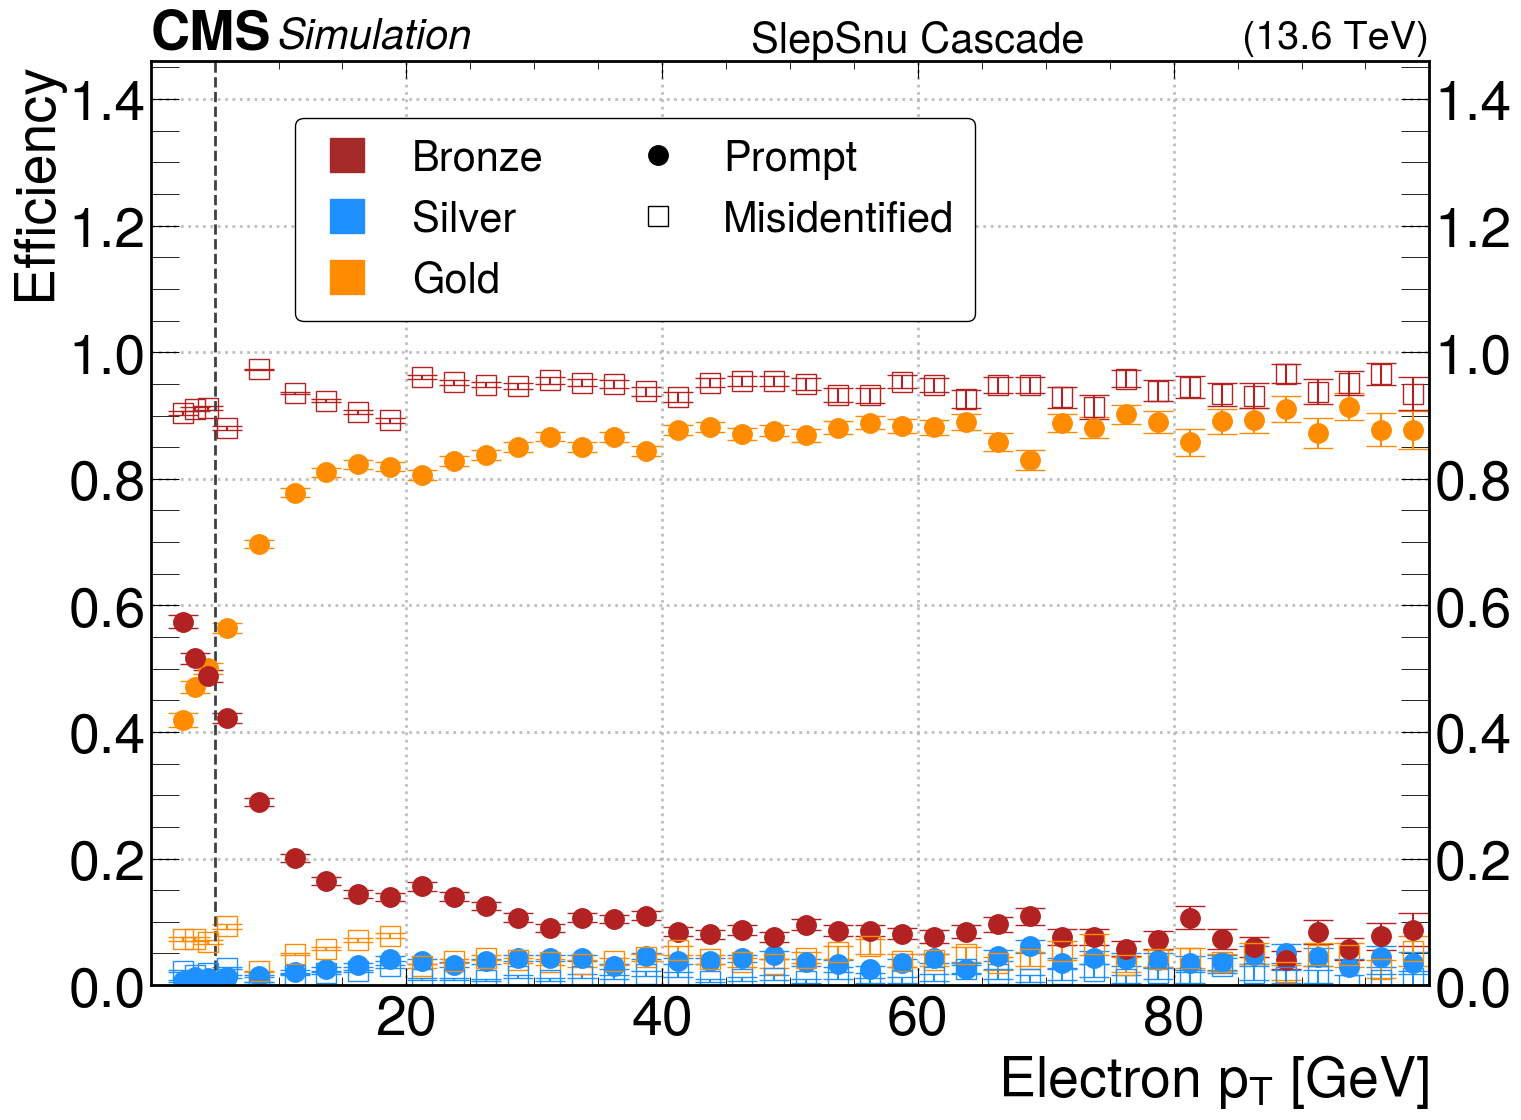

In [40]:
signal_hist = r_slepsnu['ele_dict']['pt_AN_hist_v2']
fakes_hist = r_ttbar['ele_dict']['pt_AN_hist_v2']

make_AN_1d_pt_eff(
    signal_hist,
    fakes_hist,
    name="SlepSnu_sig_ttbar_fake_v2",
    plot_txt = r"SlepSnu Cascade",
    savefig=True
)

(<Figure size 1650x1200 with 1 Axes>,
 <Axes: xlabel='Electron $p_T$ [GeV]', ylabel='Efficiency'>)

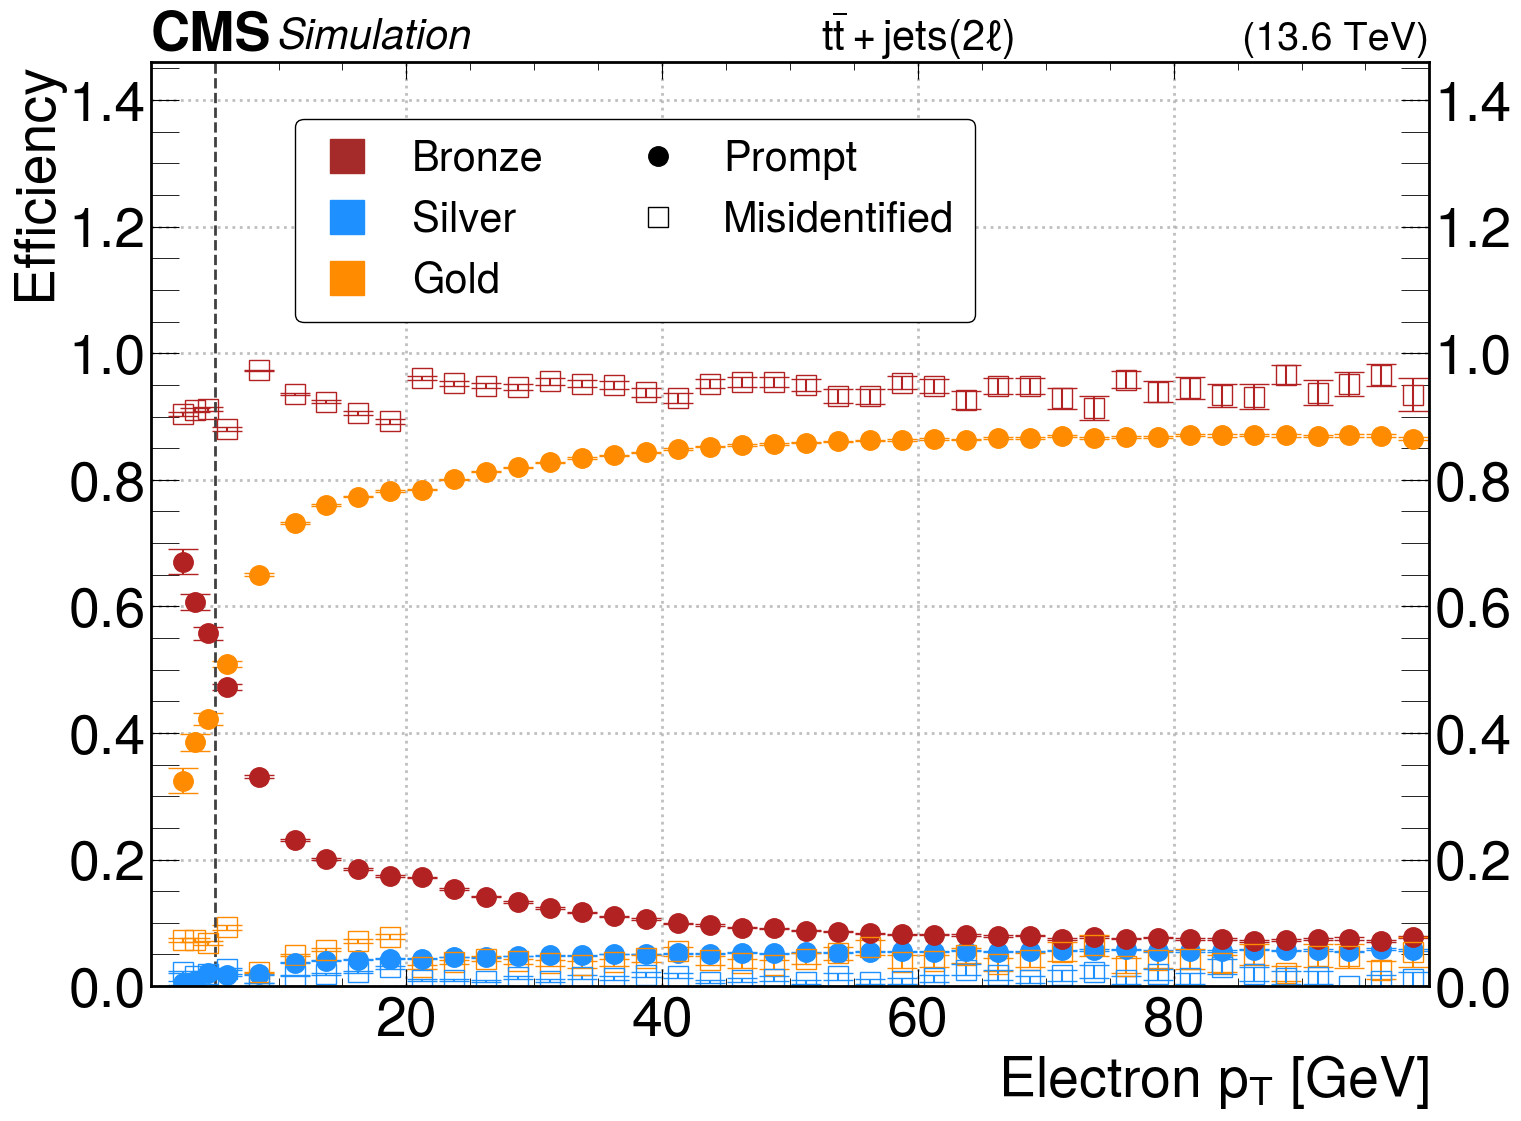

In [41]:
signal_hist = r_ttbar['ele_dict']['pt_AN_hist_v2']
fakes_hist = r_ttbar['ele_dict']['pt_AN_hist_v2']


make_AN_1d_pt_eff(
    signal_hist,
    fakes_hist,
    name="ttbar_sig_ttbar_fake_v2",
    plot_txt = r"$t\overline{t} + jets (2\ell)$",
    savefig=True
)

(<Figure size 1650x1200 with 1 Axes>,
 <Axes: xlabel='Electron $p_T$ [GeV]', ylabel='Efficiency'>)

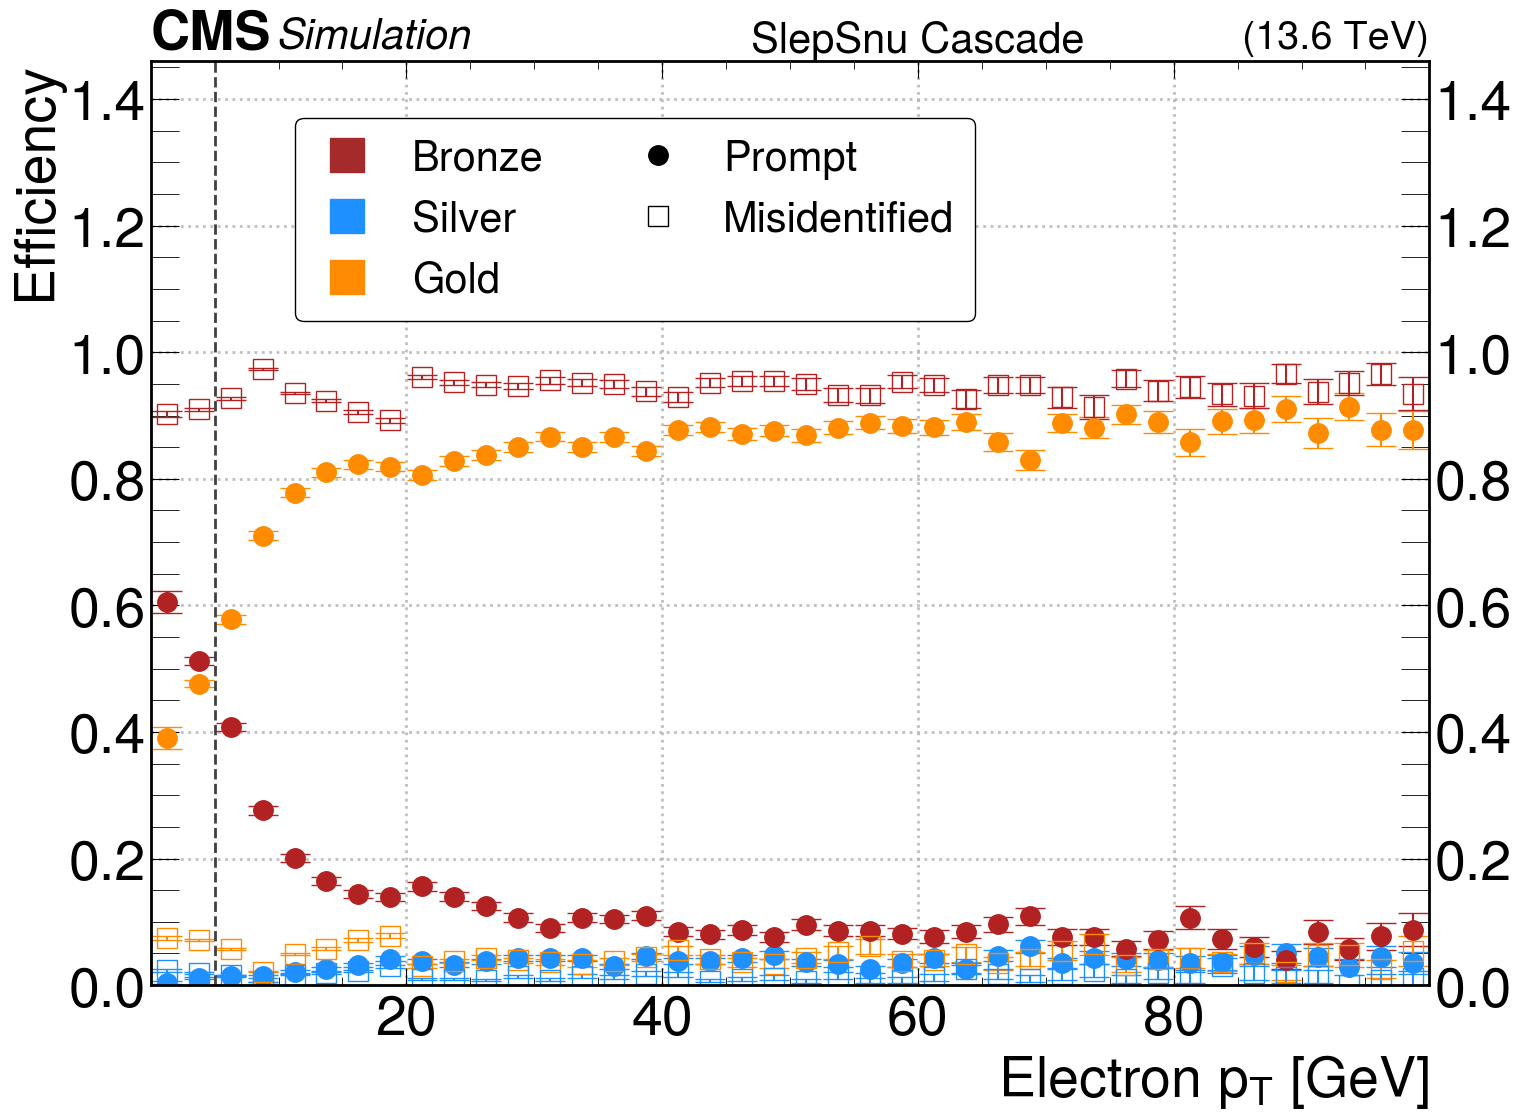

In [42]:
signal_hist = r_slepsnu['ele_dict']['pt_AN_hist_v1']
fakes_hist = r_ttbar['ele_dict']['pt_AN_hist_v1']

make_AN_1d_pt_eff(
    signal_hist,
    fakes_hist,
    name="SlepSnu_sig_ttbar_fake_v1",
    plot_txt = r"SlepSnu Cascade",
    savefig=True
)

(<Figure size 1650x1200 with 1 Axes>,
 <Axes: xlabel='Electron $p_T$ [GeV]', ylabel='Efficiency'>)

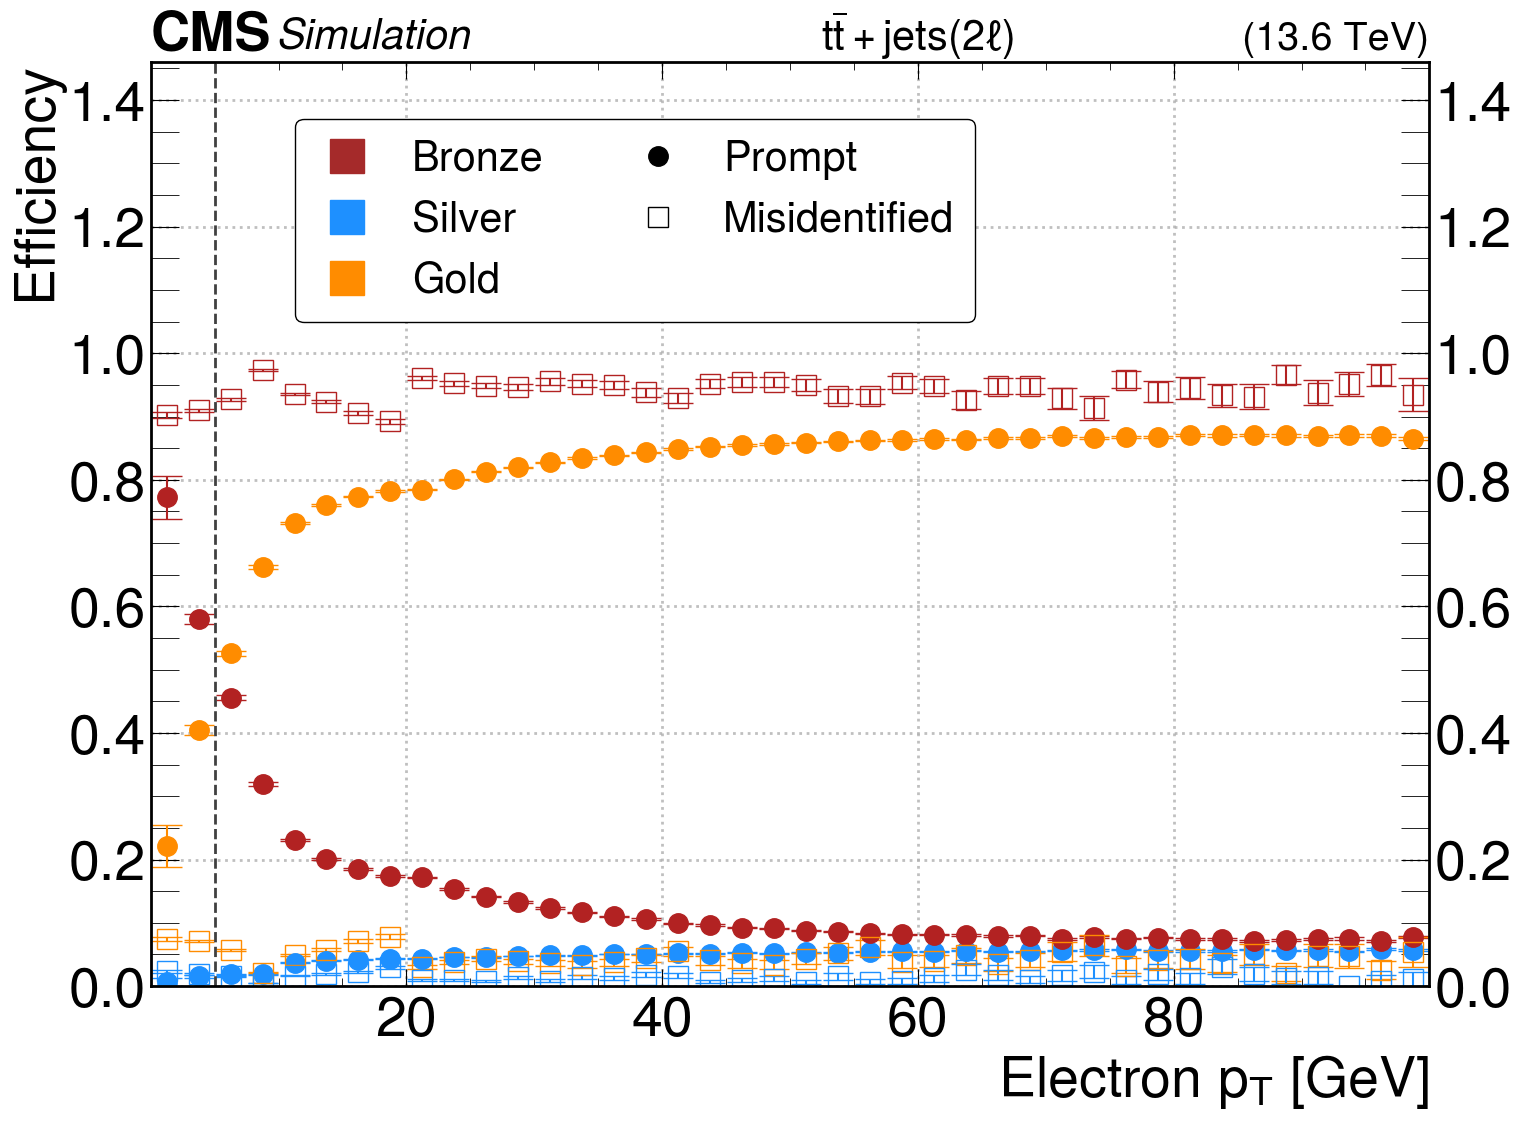

In [43]:
signal_hist = r_ttbar['ele_dict']['pt_AN_hist_v1']
fakes_hist = r_ttbar['ele_dict']['pt_AN_hist_v1']


make_AN_1d_pt_eff(
    signal_hist,
    fakes_hist,
    name="ttbar_sig_ttbar_fake_v1",
    plot_txt = r"$t\overline{t} + jets (2\ell)$",
    savefig=True
)

(<Figure size 1650x1200 with 1 Axes>,
 <Axes: xlabel='Electron $p_T$ [GeV]', ylabel='Efficiency'>)

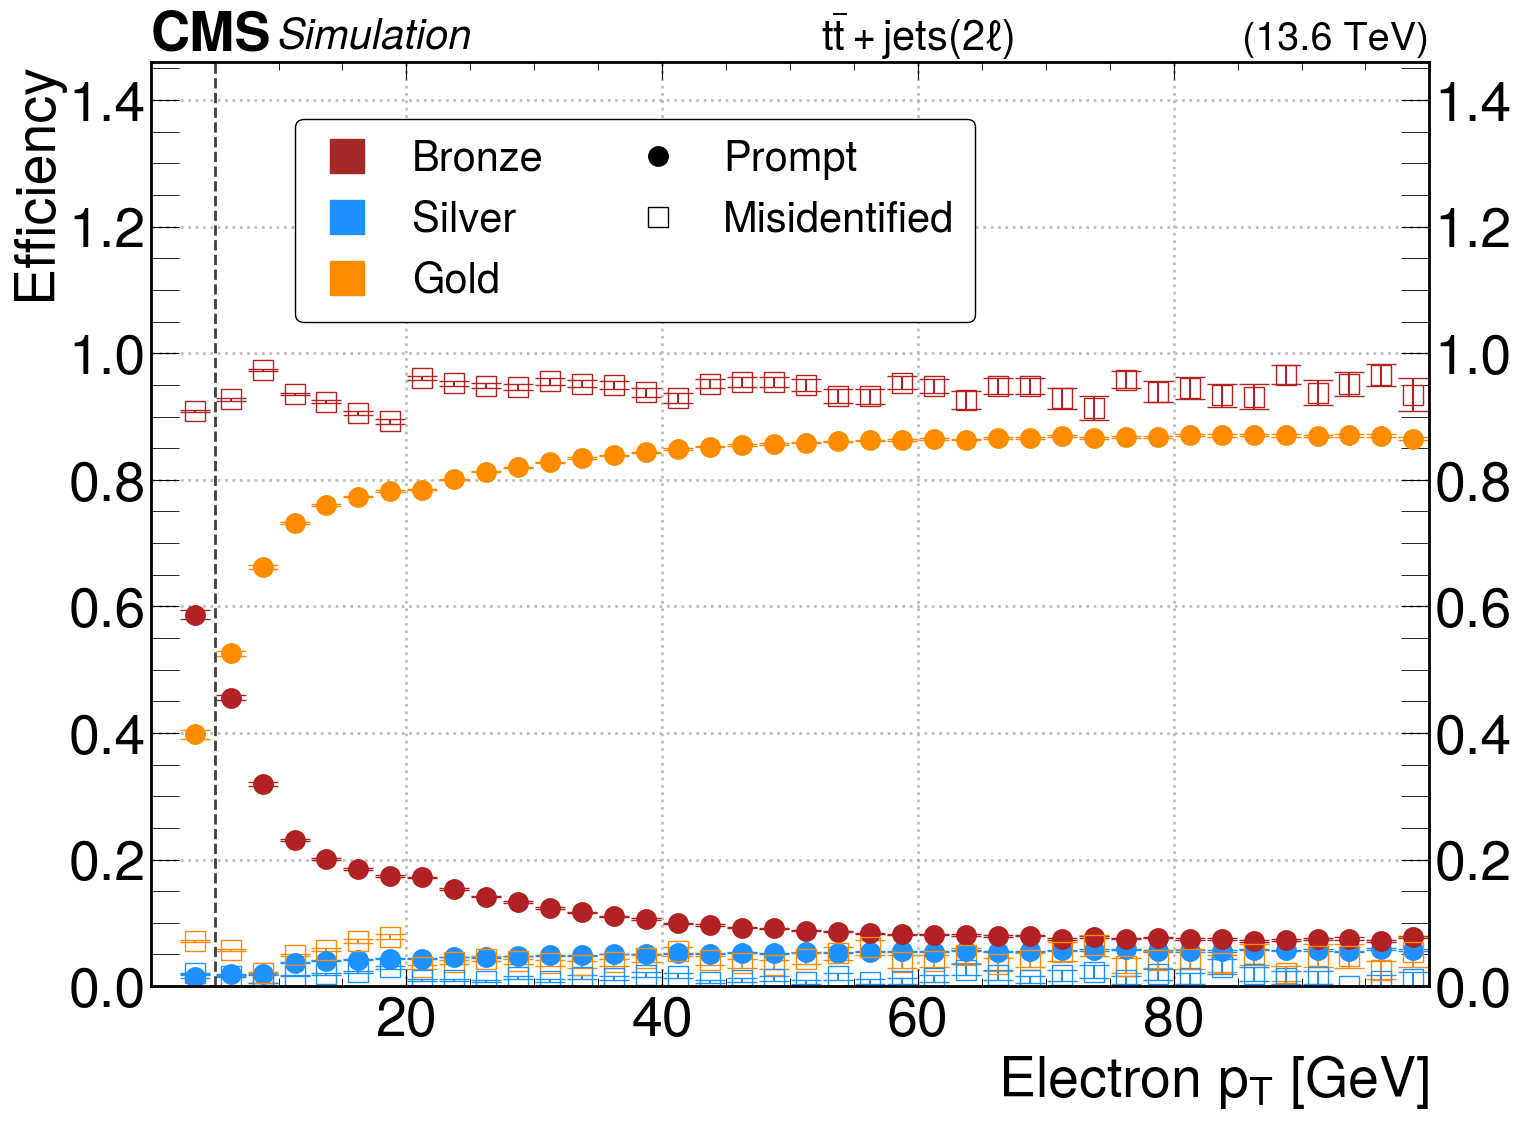

In [45]:
signal_hist = r_ttbar['ele_dict']['pt_AN_hist_v3']
fakes_hist = r_ttbar['ele_dict']['pt_AN_hist_v3']


make_AN_1d_pt_eff(
    signal_hist,
    fakes_hist,
    name="ttbar_sig_ttbar_fake_v3",
    plot_txt = r"$t\overline{t} + jets (2\ell)$",
    savefig=True
)

(<Figure size 1650x1200 with 1 Axes>,
 <Axes: xlabel='Electron $p_T$ [GeV]', ylabel='Efficiency'>)

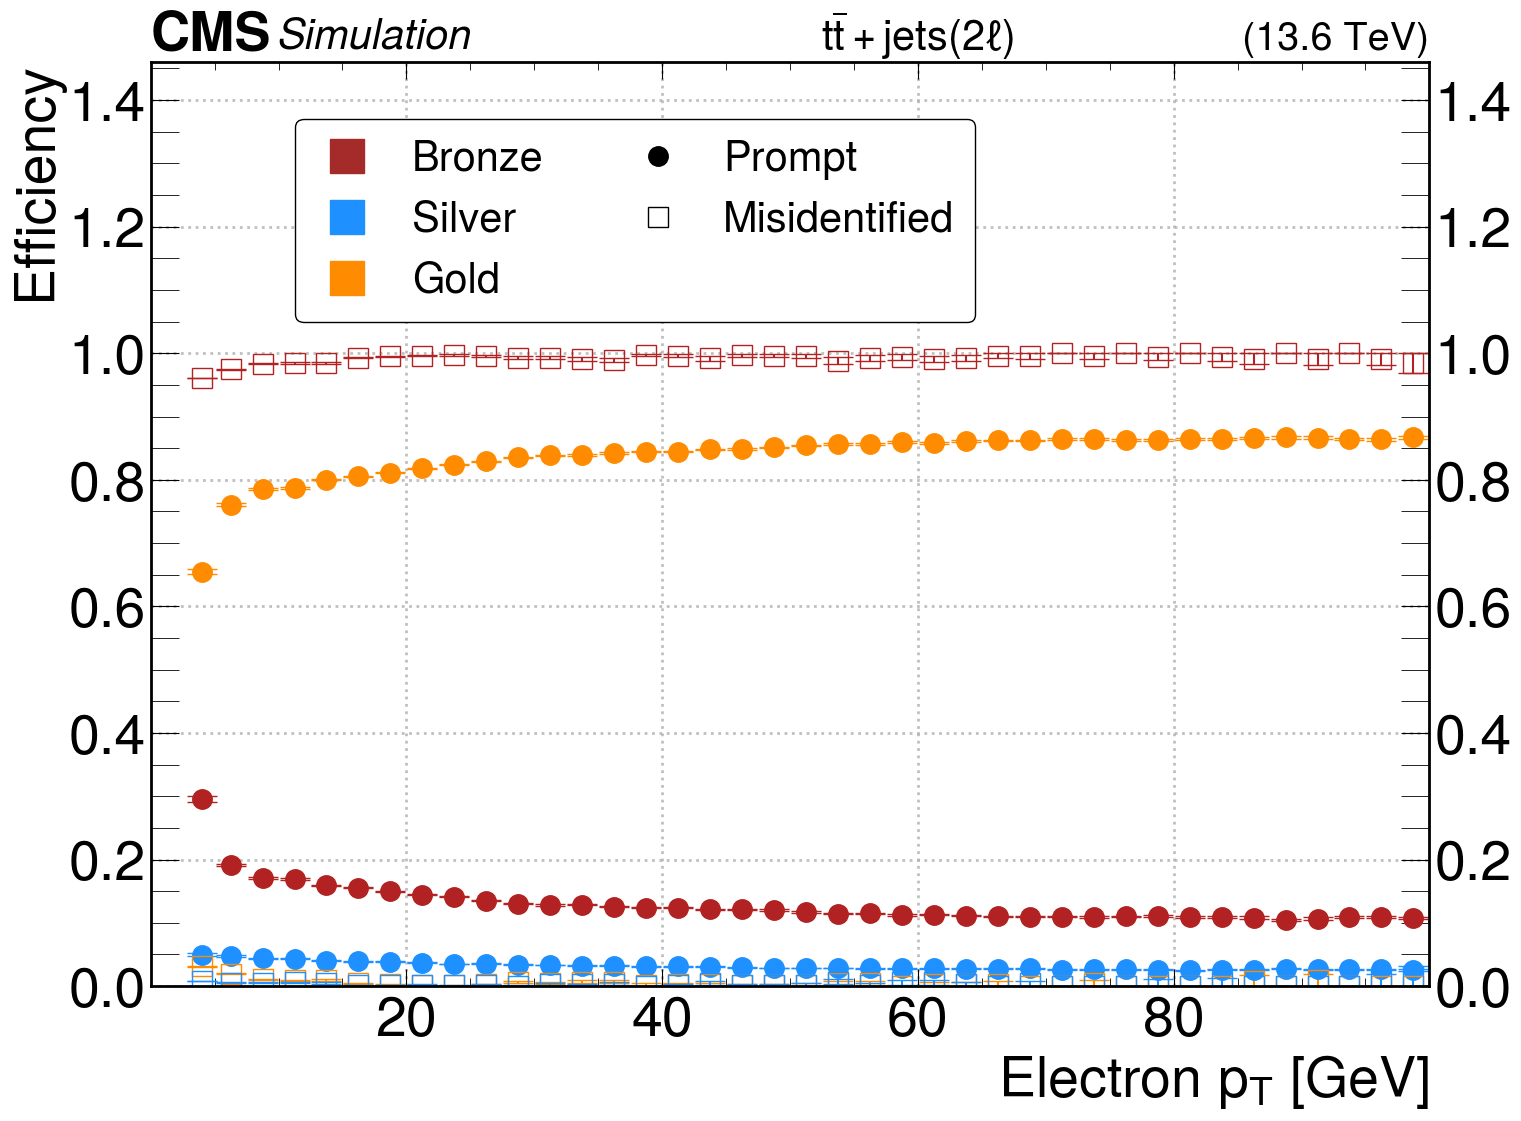

In [50]:
signal_hist = r_ttbar['muon_dict']['pt_AN_hist_muon']
fakes_hist = r_ttbar['muon_dict']['pt_AN_hist_muon']

make_AN_1d_pt_eff(
    signal_hist,
    fakes_hist,
    name="ttbar_sig_ttbar_fake_muons",
    plot_txt = r"$t\overline{t} + jets (2\ell)$",
    savefig=True
)